In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)

n_states = env.observation_space.n
n_actions = env.action_space.n

alpha = 0.1          # learning rate
gamma = 0.99         # discount factor
epsilon = 1.0        # initial exploration rate
epsilon_min = 0.01
episodes = 1000

epsilon_decay = (epsilon - epsilon_min) / episodes

Q = np.zeros((n_states, n_actions))


rewards = []
successes = []


# Training Loop

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    success = 0

    while not done:
        # ε-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-learning update rule
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if terminated and reward == 1:
            success = 1

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon - epsilon_decay)

    rewards.append(total_reward)
    successes.append(success)

env.close()


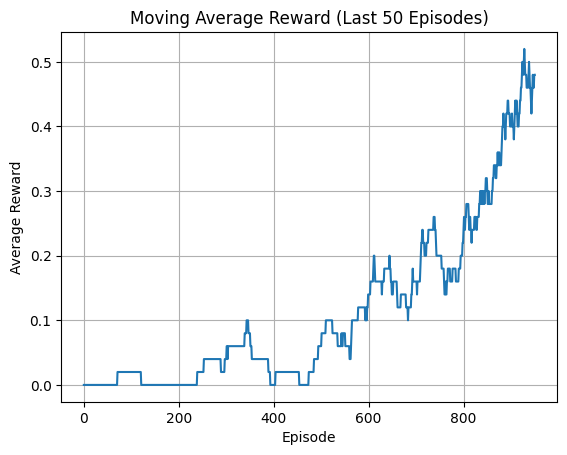

In [3]:
window = 50
moving_avg_rewards = np.convolve(
    rewards, np.ones(window) / window, mode="valid"
)

plt.figure()
plt.plot(moving_avg_rewards)
plt.title("Moving Average Reward (Last 50 Episodes)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid()
plt.show()


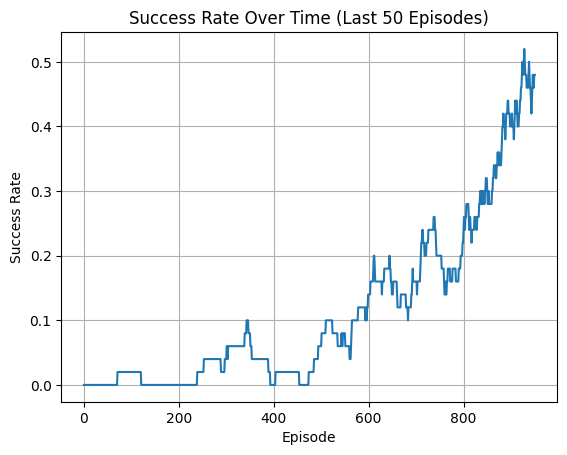

In [4]:
success_rate = np.convolve(
    successes, np.ones(window) / window, mode="valid"
)

plt.figure()
plt.plot(success_rate)
plt.title("Success Rate Over Time (Last 50 Episodes)")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.grid()
plt.show()


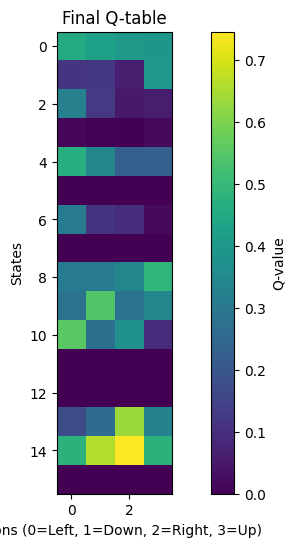

In [5]:
plt.figure(figsize=(10, 6))
plt.imshow(Q, cmap="viridis")
plt.colorbar(label="Q-value")
plt.xlabel("Actions (0=Left, 1=Down, 2=Right, 3=Up)")
plt.ylabel("States")
plt.title("Final Q-table")
plt.show()


In [6]:
test_episodes = 10
test_successes = 0

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True, render_mode="human")

for ep in range(test_episodes):
    state, _ = env.reset()
    done = False

    while not done:
        action = np.argmax(Q[state])  # no exploration
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        if terminated and reward == 1:
            test_successes += 1

env.close()

print(f"Test Success Rate: {test_successes}/{test_episodes}")


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Test Success Rate: 8/10
